In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#데이터 추출
spectrum_data = pd.read_csv("spectrum.txt", sep=r'\s+')
k = spectrum_data['k']
E_k = spectrum_data['E(k)']
#physical quantities (paramater)
v = 0.000185
dt = 0.0002
t_1 = 0
t_2 = 10.056
ep = 0.103
len(k)
len(E_k)

483

![nn](equation.png)

![nn](equation2.png)

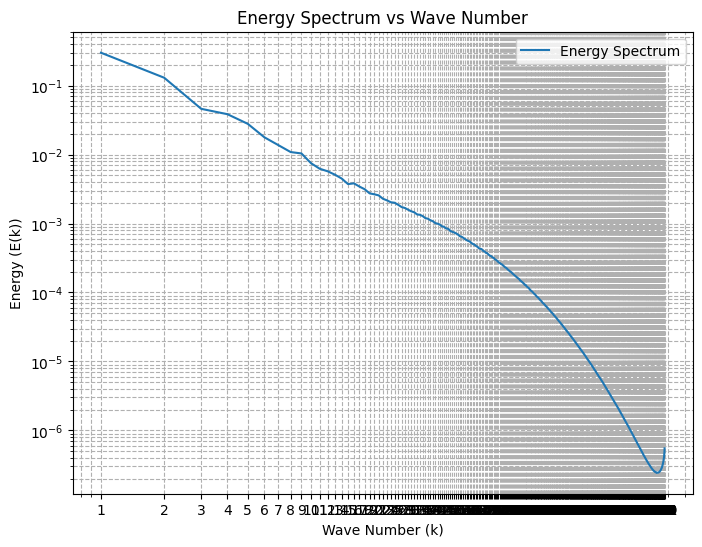

In [9]:
plt.figure(figsize=(8,6))
plt.loglog(k, E_k, label = 'Energy Spectrum')
plt.xlabel('Wave Number (k)')
plt.ylabel('Energy (E(k))')
plt.title('Energy Spectrum vs Wave Number')
plt.grid(True, which = "both", ls="--")
plt.legend()
plt.show()

In [77]:
energy_re_data = pd.read_csv("ener_Re_time.txt", sep=r'\s+')
time = energy_re_data['time']
energy = energy_re_data['energy']
re_lambda = energy_re_data['Re_lambda']

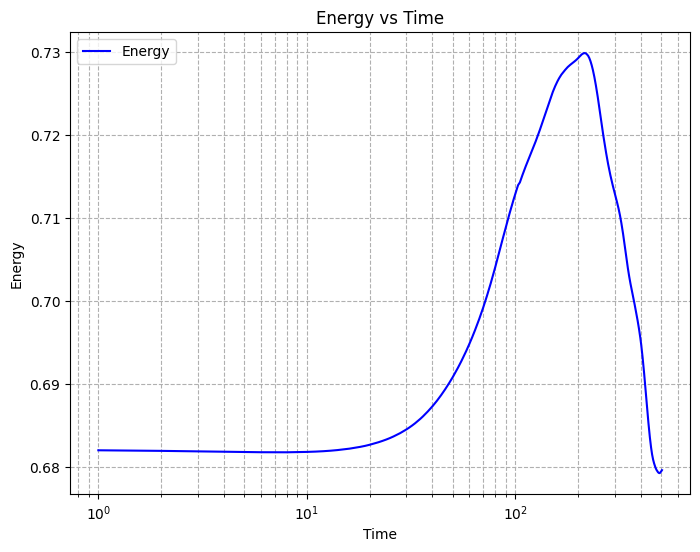

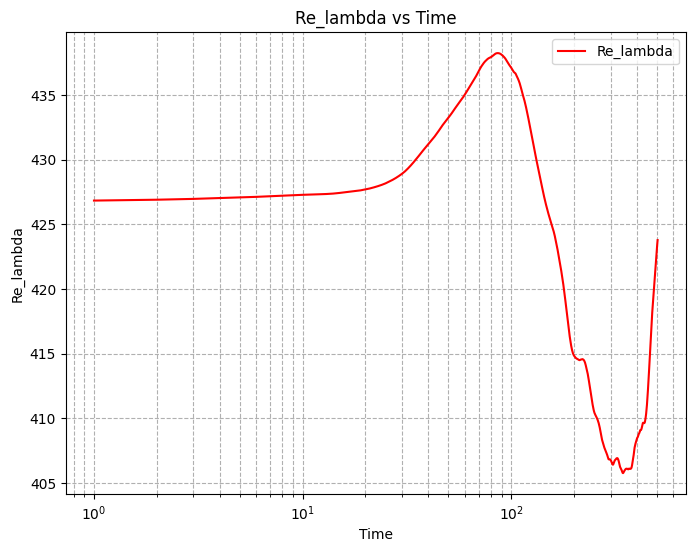

In [35]:
#에너지
plt.figure(figsize=(8,6))
plt.plot(time, energy, label='Energy', color='b')
plt.xscale('log')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy vs Time')
plt.grid(True, which = 'both', ls='--')
plt.legend()
plt.show()

#레이놀즈 수
plt.figure(figsize=(8,6))
plt.plot(time, re_lambda, label='Re_lambda', color='r')
plt.xscale('log')
plt.xlabel('Time')
plt.ylabel('Re_lambda')
plt.title('Re_lambda vs Time')
plt.grid(True, which = 'both', ls='--')
plt.legend()
plt.show()

In [95]:
# 유효하지 않은 데이터를 제거
spectrum_data = spectrum_data[spectrum_data['k'] != '---------------------------------------------']  # '-------' 문자열 제거

# k 값을 NumPy 배열로 변환하고 float형으로 변환
k_value = spectrum_data['k'].astype(float).values  # .astype(float) 메서드를 통해 변환

# Kolmogorov 법칙에 따른 E(k) 계산
kl = []
for i in range(len(k_value)):
    a = 1.6 * (ep**(2/3)) * (k_value[i]**(-5/3))
    kl.append(a)
print(len(k_value))
print(len(kl))
kl.append(0)
print(len(kl))

482
482
483


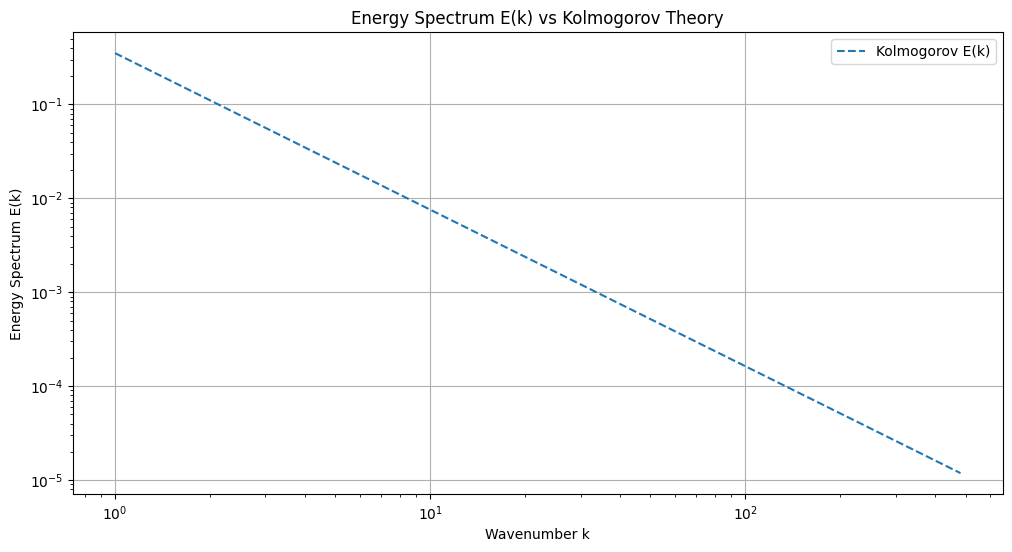

In [92]:
plt.figure(figsize=(12, 6))
plt.loglog(k_value, kl, label='Kolmogorov E(k)', linestyle='--')
plt.title('Energy Spectrum E(k) vs Kolmogorov Theory')
plt.xlabel('Wavenumber k')
plt.ylabel('Energy Spectrum E(k)')
plt.legend()
plt.grid()
plt.show()

In [97]:
new_E_k = E_k / kl

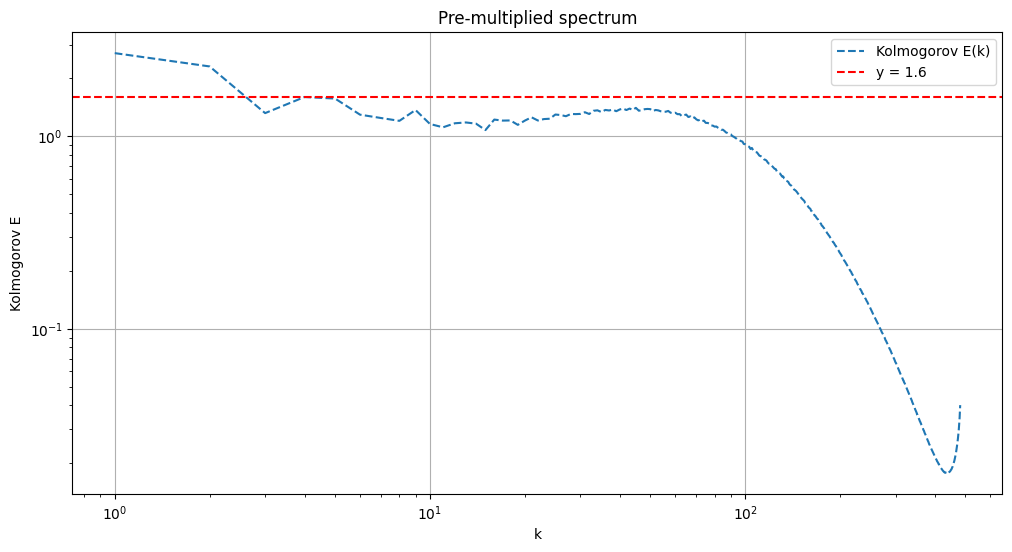

In [100]:
plt.figure(figsize=(12, 6))
plt.loglog(k, new_E_k, label='Kolmogorov E(k)', linestyle='--')
plt.axhline(y=1.6, color='r', linestyle='--', label='y = 1.6')  # y = 1.6 수평선 추가
plt.title('Pre-multiplied spectrum')
plt.xscale('log')
plt.xlabel('k')
plt.ylabel('Kolmogorov E')
plt.legend()
plt.grid()
plt.show()